# **P5 Segmentez des clients pour un site d'e-commerce**

## **Sommaire**

1. [Exploration de données](#Exploration-de-données)    
    1. [Chargement de données](#Chargement-de-données)  
    2. [RFM + Feature enginnering](#RFM-+-Feature-enginnering) 

## **Import**

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration d'affichage pour voir toutes les colonnes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## **Exploration de données**

### *Chargement des données*

In [22]:
# Charger les fichiers CSV exportés depuis SQL
customers = pd.read_csv('customers.csv')
with open('geoloc.csv', 'r', encoding='utf-8', errors='ignore') as f:
    geoloc = pd.read_csv(f)
order_items = pd.read_csv('order_items.csv')
order_pymts = pd.read_csv('order_pymts.csv')
order_reviews = pd.read_csv('order_reviews.csv', encoding='latin1')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
sellers = pd.read_csv('sellers.csv', encoding='latin1')
translation = pd.read_csv('translation.csv')

On commence par charger nos fichier préalablement exporté depuis SQLite.

In [24]:
customers.head()

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [25]:
geoloc.head()

,index,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,0,1037,-23.545621,-46.639292,sao paulo,SP
1,1,1046,-23.546081,-46.644820,sao paulo,SP
2,2,1046,-23.546129,-46.642951,sao paulo,SP
3,3,1041,-23.544392,-46.639499,sao paulo,SP
4,4,1035,-23.541578,-46.641607,sao paulo,SP


In [26]:
order_items.head()

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [27]:
order_pymts.head()

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [28]:
order_reviews.head()

,index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [29]:
orders.head()

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [30]:
products.head()

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [32]:
sellers.head()

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [41]:
translation.head()

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor


In [43]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     99441 non-null  int64 
 1   customer_id               99441 non-null  object
 2   customer_unique_id        99441 non-null  object
 3   customer_zip_code_prefix  99441 non-null  int64 
 4   customer_city             99441 non-null  object
 5   customer_state            99441 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.6+ MB


Pas de données manquantes, mélange d'int et d'object.

In [46]:
geoloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 6 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   index                        1000163 non-null  int64  
 1   geolocation_zip_code_prefix  1000163 non-null  int64  
 2   geolocation_lat              1000163 non-null  float64
 3   geolocation_lng              1000163 non-null  float64
 4   geolocation_city             1000163 non-null  object 
 5   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 45.8+ MB


Pas de données manquantes, mélange d'int et d'object.

In [49]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                112650 non-null  int64  
 1   order_id             112650 non-null  object 
 2   order_item_id        112650 non-null  int64  
 3   product_id           112650 non-null  object 
 4   seller_id            112650 non-null  object 
 5   shipping_limit_date  112650 non-null  object 
 6   price                112650 non-null  float64
 7   freight_value        112650 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 6.9+ MB


Pas de données manquantes, mélange d'int et d'object.

In [52]:
order_pymts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 103886 non-null  int64  
 1   order_id              103886 non-null  object 
 2   payment_sequential    103886 non-null  int64  
 3   payment_type          103886 non-null  object 
 4   payment_installments  103886 non-null  int64  
 5   payment_value         103886 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ MB


Pas de données manquantes, mélange d'int et d'object.

In [55]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   index                    99224 non-null  int64 
 1   review_id                99224 non-null  object
 2   order_id                 99224 non-null  object
 3   review_score             99224 non-null  int64 
 4   review_comment_title     11568 non-null  object
 5   review_comment_message   40977 non-null  object
 6   review_creation_date     99224 non-null  object
 7   review_answer_timestamp  99224 non-null  object
dtypes: int64(2), object(6)
memory usage: 6.1+ MB


Données manquantes pour les features review_comment_title et review_comment_message.

In [58]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   index                          99441 non-null  int64 
 1   order_id                       99441 non-null  object
 2   customer_id                    99441 non-null  object
 3   order_status                   99441 non-null  object
 4   order_purchase_timestamp       99441 non-null  object
 5   order_approved_at              99281 non-null  object
 6   order_delivered_carrier_date   97658 non-null  object
 7   order_delivered_customer_date  96476 non-null  object
 8   order_estimated_delivery_date  99441 non-null  object
dtypes: int64(1), object(8)
memory usage: 6.8+ MB


Peu de données manquantes, mélange d'int et d'object.

In [61]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       32951 non-null  int64  
 1   product_id                  32951 non-null  object 
 2   product_category_name       32341 non-null  object 
 3   product_name_lenght         32341 non-null  float64
 4   product_description_lenght  32341 non-null  float64
 5   product_photos_qty          32341 non-null  float64
 6   product_weight_g            32949 non-null  float64
 7   product_length_cm           32949 non-null  float64
 8   product_height_cm           32949 non-null  float64
 9   product_width_cm            32949 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ MB


Peu de données manquantes, mélange d'int et d'object.

In [64]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   3095 non-null   int64 
 1   seller_id               3095 non-null   object
 2   seller_zip_code_prefix  3095 non-null   int64 
 3   seller_city             3095 non-null   object
 4   seller_state            3095 non-null   object
dtypes: int64(2), object(3)
memory usage: 121.0+ KB


Pas de données manquantes, mélange d'int et d'object.

In [67]:
translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   index                          71 non-null     int64 
 1   product_category_name          71 non-null     object
 2   product_category_name_english  71 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.8+ KB


Pas de données manquantes, mélange d'int et d'object.

**'product', 'orders' et 'order_reviews' sont les seuls fichiers présentant des valeurs manquantes.**

Combien de clients différents ?

In [72]:
customers['customer_id'].nunique()

99441

Quelles sont les villes les plus représentées ?

In [75]:
geoloc['geolocation_city'].value_counts().head(10)

geolocation_city
sao paulo                135801
rio de janeiro            62151
belo horizonte            27805
so paulo                  24918
curitiba                  16593
porto alegre              13521
salvador                  11865
guarulhos                 11340
brasilia                  10475
sao bernardo do campo      8112
Name: count, dtype: int64

Top 5 des produits les plus commandés.

In [78]:
order_items['product_id'].value_counts().head(5)

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
Name: count, dtype: int64

Répartition des méthodes de paiement.

In [81]:
order_pymts['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

Moyenne des notes des avis.

In [84]:
order_reviews['review_score'].mean()

4.08642062404257

Statut des commandes

In [87]:
print(orders['order_status'].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


Quels types de produits sont les plus fréquents ?

In [90]:
products['product_category_name'].value_counts().head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: count, dtype: int64

Combien de vendeurs différents ?

In [93]:
sellers['seller_id'].nunique()

3095

### *RFM + Feature enginnering*

Commençons à crée nos variavles RFM

In [126]:
# Convertir 'order_purchase_timestamp' en type datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
# Trouver la date maximale dans les données
max_date = orders['order_purchase_timestamp'].max()
# Calculer la récence en utilisant la date maximale des données
recency_df = orders.groupby('order_id').agg({
    'order_purchase_timestamp': lambda x: (max_date - x.max()).days
}).rename(columns={'order_purchase_timestamp': 'Recency'})

In [128]:
# Calculer la fréquence d'articles pour chaque commande
frequency_df = order_items.groupby('order_id').size().reset_index(name='Frequency')

In [130]:
# Remplacer les valeurs manquantes dans la colonne 'price' par 0
order_items['price'] = order_items['price'].fillna(0) 
# Calculer la somme des prix pour chaque commande
monetary_df = order_items.groupby('order_id').agg({'price': 'sum'}).rename(columns={'price': 'Monetary'})

In [132]:
# Création d'un dataframe réunissant nos features
rfm_df = recency_df.merge(frequency_df, on='order_id').merge(monetary_df, on='order_id')
rfm_df

,order_id,Recency,Frequency,Monetary
0,00010242fe8c5a6d1ba2dd792cb16214,399,1,58.90
1,00018f77f2f0320c557190d7a144bdd3,539,1,239.90
2,000229ec398224ef6ca0657da4fc703e,276,1,199.00
3,00024acbcdf0a6daa1e931b038114c75,70,1,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,620,1,199.90
...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,177,1,299.99
98662,fffcd46ef2263f404302a634eb57f7eb,95,1,350.00
98663,fffce4705a9662cd70adb13d4a31832d,359,1,99.90
98664,fffe18544ffabc95dfada21779c9644f,428,1,55.99


In [134]:
# Création d'un dataframe avec uniquement RFM
rfm = rfm_df.drop(columns=['order_id'])
# Vérification du résultat
rfm

,Recency,Frequency,Monetary
0,399,1,58.90
1,539,1,239.90
2,276,1,199.00
3,70,1,12.99
4,620,1,199.90
...,...,...,...
98661,177,1,299.99
98662,95,1,350.00
98663,359,1,99.90
98664,428,1,55.99


Essayons de déterminer un score por chaque feature.

In [136]:
# Création des scores (1 à 5) pour chaque dimension
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=range(5, 0, -1))
rfm_df['F_Score'] = pd.cut(rfm_df['Frequency'], bins=[0., 1., 2., 4., 6., 21.], labels=range(1, 6))
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 5, labels=range(1, 6))

In [138]:
# Transformation des variables en int
rfm_df['R_Score'] = rfm_df['R_Score'].astype(int)
rfm_df['F_Score'] = rfm_df['F_Score'].astype(int)
rfm_df['M_Score'] = rfm_df['M_Score'].astype(int)

In [140]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   order_id   98666 non-null  object 
 1   Recency    98666 non-null  int64  
 2   Frequency  98666 non-null  int64  
 3   Monetary   98666 non-null  float64
 4   R_Score    98666 non-null  int32  
 5   F_Score    98666 non-null  int32  
 6   M_Score    98666 non-null  int32  
dtypes: float64(1), int32(3), int64(2), object(1)
memory usage: 4.1+ MB


In [142]:
rfm_df

,order_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,00010242fe8c5a6d1ba2dd792cb16214,399,1,58.90,2,1,2
1,00018f77f2f0320c557190d7a144bdd3,539,1,239.90,1,1,5
2,000229ec398224ef6ca0657da4fc703e,276,1,199.00,3,1,5
3,00024acbcdf0a6daa1e931b038114c75,70,1,12.99,5,1,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,620,1,199.90,1,1,5
...,...,...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,177,1,299.99,4,1,5
98662,fffcd46ef2263f404302a634eb57f7eb,95,1,350.00,5,1,5
98663,fffce4705a9662cd70adb13d4a31832d,359,1,99.90,2,1,3
98664,fffe18544ffabc95dfada21779c9644f,428,1,55.99,2,1,2


In [144]:
rfm_df.describe()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
count,98666.000000,98666.000000,98666.000000,98666.000000,98666.000000,98666.000000
mean,289.343067,1.141731,137.754076,3.006608,1.127785,2.997841
std,153.389890,0.538452,210.645145,1.413488,0.424254,1.415691
min,44.000000,1.000000,0.850000,1.000000,1.000000,1.000000
25%,165.000000,1.000000,45.900000,2.000000,1.000000,2.000000
50%,270.000000,1.000000,86.900000,3.000000,1.000000,3.000000
75%,399.000000,1.000000,149.900000,4.000000,1.000000,4.000000
max,772.000000,21.000000,13440.000000,5.000000,5.000000,5.000000


Une longue durée moyenne de Recency et une faible fréquence moyenne suggèrent une base client relativement inactive.
La majorité des clients dépensent relativement peu, bien qu'un petit pourcentage (clients VIP) représente une part importante des dépenses.
Les scores F et M sont asymétriques, ce qui pourrait être dû à une forte concentration de clients à faible activité et faible valeur monétaire.

In [147]:
# Fusionner les deux DataFrames sur 'order_id'
rfm_df = rfm_df.merge(orders[['order_id', 'order_purchase_timestamp']], on='order_id', how='left')
# Vérification
rfm_df.head()

,order_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,order_purchase_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,399,1,58.90,2,1,2,2017-09-13 08:59:02
1,00018f77f2f0320c557190d7a144bdd3,539,1,239.90,1,1,5,2017-04-26 10:53:06
2,000229ec398224ef6ca0657da4fc703e,276,1,199.00,3,1,5,2018-01-14 14:33:31
3,00024acbcdf0a6daa1e931b038114c75,70,1,12.99,5,1,1,2018-08-08 10:00:35
4,00042b26cf59d7ce69dfabb4e55b4fd9,620,1,199.90,1,1,5,2017-02-04 13:57:51


In [151]:
# Ajouter la colonne customer_id à rfm_df via un merge avec orders
rfm_df = rfm_df.merge(orders[['order_id', 'customer_id']], on='order_id', how='left')

In [153]:
# Jointure avec customers
rfm_df = rfm_df.merge(
    customers[['customer_id', 'customer_zip_code_prefix']].drop_duplicates('customer_id'),
    on='customer_id',
    how='left'
)

# Jointure avec order_pymts
rfm_df = rfm_df.merge(
    order_pymts[['order_id', 'payment_type']].drop_duplicates('order_id'),
    on='order_id',
    how='left'
)

# Jointure avec order_reviews
rfm_df = rfm_df.merge(
    order_reviews[['order_id', 'review_score']].drop_duplicates('order_id'),
    on='order_id',
    how='left'
)

# Jointure avec order_items
rfm_df = rfm_df.merge(
    order_items[['order_id', 'product_id']].drop_duplicates('order_id'),
    on='order_id',
    how='left'
)


In [295]:
rfm_df

,order_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,order_purchase_timestamp,customer_id,customer_zip_code_prefix,payment_type,review_score,product_id
0,00010242fe8c5a6d1ba2dd792cb16214,399,1,58.90,2,1,2,2017-09-13 08:59:02,3ce436f183e68e07877b285a838db11a,28013,credit_card,5.0,4244733e06e7ecb4970a6e2683c13e61
1,00018f77f2f0320c557190d7a144bdd3,539,1,239.90,1,1,5,2017-04-26 10:53:06,f6dd3ec061db4e3987629fe6b26e5cce,15775,credit_card,4.0,e5f2d52b802189ee658865ca93d83a8f
2,000229ec398224ef6ca0657da4fc703e,276,1,199.00,3,1,5,2018-01-14 14:33:31,6489ae5e4333f3693df5ad4372dab6d3,35661,credit_card,5.0,c777355d18b72b67abbeef9df44fd0fd
3,00024acbcdf0a6daa1e931b038114c75,70,1,12.99,5,1,1,2018-08-08 10:00:35,d4eb9395c8c0431ee92fce09860c5a06,12952,credit_card,4.0,7634da152a4610f1595efa32f14722fc
4,00042b26cf59d7ce69dfabb4e55b4fd9,620,1,199.90,1,1,5,2017-02-04 13:57:51,58dbd0b2d70206bf40e62cd34e84d795,13226,credit_card,5.0,ac6c3623068f30de03045865e4e10089
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,177,1,299.99,4,1,5,2018-04-23 13:57:06,b51593916b4b8e0d6f66f2ae24f2673d,65077,boleto,5.0,4aa6014eceb682077f9dc4bffebc05b0
98662,fffcd46ef2263f404302a634eb57f7eb,95,1,350.00,5,1,5,2018-07-14 10:26:46,84c5d4fbaf120aae381fad077416eaa0,81690,boleto,5.0,32e07fd915822b0765e448c4dd74c828
98663,fffce4705a9662cd70adb13d4a31832d,359,1,99.90,2,1,3,2017-10-23 17:07:56,29309aa813182aaddc9b259e31b870e6,4039,credit_card,5.0,72a30483855e2eafc67aee5dc2560482
98664,fffe18544ffabc95dfada21779c9644f,428,1,55.99,2,1,2,2017-08-14 23:02:59,b5e6afd5a41800fdf401e0272ca74655,13289,credit_card,5.0,9c422a519119dcad7575db5af1ba540e


In [155]:
# Ajouter la catégorie des produits dans rfm_df
rfm_df = rfm_df.merge(products[['product_id', 'product_category_name']],on='product_id',how='left')
# Ajouter les noms des catégories de produits en anglais
rfm_df = rfm_df.merge(translation[['product_category_name', 'product_category_name_english']],on='product_category_name',how='left')
# Afficher le DataFrame final
rfm_df.head()

,order_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,order_purchase_timestamp,customer_id,customer_zip_code_prefix,payment_type,review_score,product_id,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,399,1,58.90,2,1,2,2017-09-13 08:59:02,3ce436f183e68e07877b285a838db11a,28013,credit_card,5.0,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,539,1,239.90,1,1,5,2017-04-26 10:53:06,f6dd3ec061db4e3987629fe6b26e5cce,15775,credit_card,4.0,e5f2d52b802189ee658865ca93d83a8f,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,276,1,199.00,3,1,5,2018-01-14 14:33:31,6489ae5e4333f3693df5ad4372dab6d3,35661,credit_card,5.0,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,70,1,12.99,5,1,1,2018-08-08 10:00:35,d4eb9395c8c0431ee92fce09860c5a06,12952,credit_card,4.0,7634da152a4610f1595efa32f14722fc,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,620,1,199.90,1,1,5,2017-02-04 13:57:51,58dbd0b2d70206bf40e62cd34e84d795,13226,credit_card,5.0,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,garden_tools


In [157]:
# Supprimer les colonnes product_id et product_category_name
rfm_df.drop(columns=['product_id', 'product_category_name'], inplace=True)
rfm_df

,order_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,order_purchase_timestamp,customer_id,customer_zip_code_prefix,payment_type,review_score,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,399,1,58.90,2,1,2,2017-09-13 08:59:02,3ce436f183e68e07877b285a838db11a,28013,credit_card,5.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,539,1,239.90,1,1,5,2017-04-26 10:53:06,f6dd3ec061db4e3987629fe6b26e5cce,15775,credit_card,4.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,276,1,199.00,3,1,5,2018-01-14 14:33:31,6489ae5e4333f3693df5ad4372dab6d3,35661,credit_card,5.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,70,1,12.99,5,1,1,2018-08-08 10:00:35,d4eb9395c8c0431ee92fce09860c5a06,12952,credit_card,4.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,620,1,199.90,1,1,5,2017-02-04 13:57:51,58dbd0b2d70206bf40e62cd34e84d795,13226,credit_card,5.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,177,1,299.99,4,1,5,2018-04-23 13:57:06,b51593916b4b8e0d6f66f2ae24f2673d,65077,boleto,5.0,housewares
98662,fffcd46ef2263f404302a634eb57f7eb,95,1,350.00,5,1,5,2018-07-14 10:26:46,84c5d4fbaf120aae381fad077416eaa0,81690,boleto,5.0,computers_accessories
98663,fffce4705a9662cd70adb13d4a31832d,359,1,99.90,2,1,3,2017-10-23 17:07:56,29309aa813182aaddc9b259e31b870e6,4039,credit_card,5.0,sports_leisure
98664,fffe18544ffabc95dfada21779c9644f,428,1,55.99,2,1,2,2017-08-14 23:02:59,b5e6afd5a41800fdf401e0272ca74655,13289,credit_card,5.0,computers_accessories


In [159]:
rfm_df['product_category_name_english'].unique()

array(['cool_stuff', 'pet_shop', 'furniture_decor', 'perfumery',
       'garden_tools', 'housewares', 'telephony', 'health_beauty',
       'books_technical', 'fashion_bags_accessories', 'bed_bath_table',
       'sports_leisure', 'consoles_games', 'office_furniture',
       'luggage_accessories', 'food', 'agro_industry_and_commerce',
       'electronics', 'computers_accessories',
       'construction_tools_construction', 'audio', 'baby',
       'construction_tools_lights', 'toys', 'stationery',
       'industry_commerce_and_business', 'watches_gifts', 'auto', nan,
       'home_appliances', 'kitchen_dining_laundry_garden_furniture',
       'air_conditioning', 'home_confort', 'fixed_telephony',
       'small_appliances_home_oven_and_coffee', 'diapers_and_hygiene',
       'signaling_and_security', 'musical_instruments',
       'small_appliances', 'costruction_tools_garden', 'art',
       'home_construction', 'books_general_interest', 'party_supplies',
       'construction_tools_safety', 'c

In [161]:
# Dictionnaire de regroupement
category_mapping = {
    'electronics': 'Electronics and Technology',
    'computers_accessories': 'Electronics and Technology',
    'telephony': 'Electronics and Technology',
    'audio': 'Electronics and Technology',
    'computers': 'Electronics and Technology',
    'tablets_printing_image': 'Electronics and Technology',
    'cine_photo': 'Electronics and Technology',
    'fixed_telephony': 'Electronics and Technology',
    
    'furniture_decor': 'Home and Furniture',
    'bed_bath_table': 'Home and Furniture',
    'furniture_living_room': 'Home and Furniture',
    'furniture_bedroom': 'Home and Furniture',
    'furniture_mattress_and_upholstery': 'Home and Furniture',
    'home_appliances': 'Home and Furniture',
    'home_appliances_2': 'Home and Furniture',
    'kitchen_dining_laundry_garden_furniture': 'Home and Furniture',
    'home_confort': 'Home and Furniture',
    'home_comfort_2': 'Home and Furniture',

    'fashion_bags_accessories': 'Fashion and Accessories',
    'fashion_shoes': 'Fashion and Accessories',
    'fashion_underwear_beach': 'Fashion and Accessories',
    'fashion_male_clothing': 'Fashion and Accessories',
    'fashio_female_clothing': 'Fashion and Accessories',
    'fashion_sport': 'Fashion and Accessories',
    'fashion_childrens_clothes': 'Fashion and Accessories',

    'health_beauty': 'Health and Beauty',
    'diapers_and_hygiene': 'Health and Beauty',
    'perfumery': 'Health and Beauty',

    'books_technical': 'Books and Media',
    'books_general_interest': 'Books and Media',
    'books_imported': 'Books and Media',
    'music': 'Books and Media',
    'dvds_blu_ray': 'Books and Media',
    'cds_dvds_musicals': 'Books and Media',

    'toys': 'Toys and Entertainment',
    'consoles_games': 'Toys and Entertainment',
    'party_supplies': 'Toys and Entertainment',

    'sports_leisure': 'Sports and Outdoor',
    'garden_tools': 'Sports and Outdoor',
    'costruction_tools_garden': 'Sports and Outdoor',

    'food': 'Food and Beverages',
    'food_drink': 'Food and Beverages',
    'drinks': 'Food and Beverages',
    'flowers': 'Food and Beverages',
    'christmas_supplies': 'Food and Beverages',

    'industry_commerce_and_business': 'Industry and Business',
    'agro_industry_and_commerce': 'Industry and Business',
    'construction_tools_construction': 'Industry and Business',
    'construction_tools_tools': 'Industry and Business',
    'construction_tools_safety': 'Industry and Business',
    'signaling_and_security': 'Industry and Business',
    'security_and_services': 'Industry and Business',

    'cool_stuff': 'Others',
    'pet_shop': 'Others',
    'market_place': 'Others',
    'watches_gifts': 'Others',
    'small_appliances': 'Others',
    'small_appliances_home_oven_and_coffee': 'Others',
    'arts_and_craftmanship': 'Others',
    'art': 'Others',
    'auto': 'Others',
    'baby': 'Others',
    'air_conditioning': 'Others',
    'la_cuisine': 'Others'
}

# Appliquer le regroupement
rfm_df['Product_Category'] = rfm_df['product_category_name_english'].map(category_mapping)


In [163]:
rfm_df['Product_Category']

0                            Others
1                            Others
2                Home and Furniture
3                 Health and Beauty
4                Sports and Outdoor
                    ...            
98661                           NaN
98662    Electronics and Technology
98663            Sports and Outdoor
98664    Electronics and Technology
98665            Home and Furniture
Name: Product_Category, Length: 98666, dtype: object

In [165]:
# Recherche de NaN
nan_count = rfm_df['Product_Category'].isna().sum()
nan_count

13275

In [167]:
# Remplace les valeurs manquantes par Others
rfm_df['Product_Category'] = rfm_df['Product_Category'].fillna('Others')
nan_count = rfm_df['Product_Category'].isna().sum()
nan_count

0

In [169]:
# Supprimer la colonne 'product_category_name_english'
rfm_df.drop(columns=['product_category_name_english'], inplace=True)
rfm_df

,order_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,order_purchase_timestamp,customer_id,customer_zip_code_prefix,payment_type,review_score,Product_Category
0,00010242fe8c5a6d1ba2dd792cb16214,399,1,58.90,2,1,2,2017-09-13 08:59:02,3ce436f183e68e07877b285a838db11a,28013,credit_card,5.0,Others
1,00018f77f2f0320c557190d7a144bdd3,539,1,239.90,1,1,5,2017-04-26 10:53:06,f6dd3ec061db4e3987629fe6b26e5cce,15775,credit_card,4.0,Others
2,000229ec398224ef6ca0657da4fc703e,276,1,199.00,3,1,5,2018-01-14 14:33:31,6489ae5e4333f3693df5ad4372dab6d3,35661,credit_card,5.0,Home and Furniture
3,00024acbcdf0a6daa1e931b038114c75,70,1,12.99,5,1,1,2018-08-08 10:00:35,d4eb9395c8c0431ee92fce09860c5a06,12952,credit_card,4.0,Health and Beauty
4,00042b26cf59d7ce69dfabb4e55b4fd9,620,1,199.90,1,1,5,2017-02-04 13:57:51,58dbd0b2d70206bf40e62cd34e84d795,13226,credit_card,5.0,Sports and Outdoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,177,1,299.99,4,1,5,2018-04-23 13:57:06,b51593916b4b8e0d6f66f2ae24f2673d,65077,boleto,5.0,Others
98662,fffcd46ef2263f404302a634eb57f7eb,95,1,350.00,5,1,5,2018-07-14 10:26:46,84c5d4fbaf120aae381fad077416eaa0,81690,boleto,5.0,Electronics and Technology
98663,fffce4705a9662cd70adb13d4a31832d,359,1,99.90,2,1,3,2017-10-23 17:07:56,29309aa813182aaddc9b259e31b870e6,4039,credit_card,5.0,Sports and Outdoor
98664,fffe18544ffabc95dfada21779c9644f,428,1,55.99,2,1,2,2017-08-14 23:02:59,b5e6afd5a41800fdf401e0272ca74655,13289,credit_card,5.0,Electronics and Technology


Enrichissement du data enginnering :

In [172]:
# Indice de satisfaction
rfm_df['Weighted_Review_Score'] = rfm_df['review_score'] * rfm_df['Frequency']
# Indicateur de fidélité
rfm_df['Loyalty_Index'] = (1 / (1 + rfm_df['Recency'])) * rfm_df['Frequency']

In [174]:
rfm_df.head()

,order_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,order_purchase_timestamp,customer_id,customer_zip_code_prefix,payment_type,review_score,Product_Category,Weighted_Review_Score,Loyalty_Index
0,00010242fe8c5a6d1ba2dd792cb16214,399,1,58.90,2,1,2,2017-09-13 08:59:02,3ce436f183e68e07877b285a838db11a,28013,credit_card,5.0,Others,5.0,0.002500
1,00018f77f2f0320c557190d7a144bdd3,539,1,239.90,1,1,5,2017-04-26 10:53:06,f6dd3ec061db4e3987629fe6b26e5cce,15775,credit_card,4.0,Others,4.0,0.001852
2,000229ec398224ef6ca0657da4fc703e,276,1,199.00,3,1,5,2018-01-14 14:33:31,6489ae5e4333f3693df5ad4372dab6d3,35661,credit_card,5.0,Home and Furniture,5.0,0.003610
3,00024acbcdf0a6daa1e931b038114c75,70,1,12.99,5,1,1,2018-08-08 10:00:35,d4eb9395c8c0431ee92fce09860c5a06,12952,credit_card,4.0,Health and Beauty,4.0,0.014085
4,00042b26cf59d7ce69dfabb4e55b4fd9,620,1,199.90,1,1,5,2017-02-04 13:57:51,58dbd0b2d70206bf40e62cd34e84d795,13226,credit_card,5.0,Sports and Outdoor,5.0,0.001610


In [176]:
rfm_df['payment_type'].nunique()

4

Standardisation de nos valeurs numériques

In [178]:
# Identifier les colonnes numériques
numeric_columns = rfm_df.select_dtypes(include=['float64', 'int64']).columns
# Initialiser le scaler
scaler = StandardScaler()
# Standardiser les variables numériques
rfm_df[numeric_columns] = scaler.fit_transform(rfm_df[numeric_columns])
# Vérification
print(rfm_df[numeric_columns].head())

    Recency  Frequency  Monetary  customer_zip_code_prefix  review_score  \
0  0.714894   -0.26322 -0.374347                 -0.239742      0.672171   
1  1.627605   -0.26322  0.484922                 -0.650432     -0.078967   
2 -0.086988   -0.26322  0.290755                  0.016914      0.672171   
3 -1.429978   -0.26322 -0.592298                 -0.745168     -0.078967   
4  2.155674   -0.26322  0.295028                 -0.735973      0.672171   

   Weighted_Review_Score  Loyalty_Index  
0               0.162736      -0.615072  
1              -0.245750      -0.739293  
2               0.162736      -0.402313  
3              -0.245750       1.605167  
4               0.162736      -0.785587  


In [180]:
rfm_df

,order_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,order_purchase_timestamp,customer_id,customer_zip_code_prefix,payment_type,review_score,Product_Category,Weighted_Review_Score,Loyalty_Index
0,00010242fe8c5a6d1ba2dd792cb16214,0.714894,-0.26322,-0.374347,2,1,2,2017-09-13 08:59:02,3ce436f183e68e07877b285a838db11a,-0.239742,credit_card,0.672171,Others,0.162736,-0.615072
1,00018f77f2f0320c557190d7a144bdd3,1.627605,-0.26322,0.484922,1,1,5,2017-04-26 10:53:06,f6dd3ec061db4e3987629fe6b26e5cce,-0.650432,credit_card,-0.078967,Others,-0.245750,-0.739293
2,000229ec398224ef6ca0657da4fc703e,-0.086988,-0.26322,0.290755,3,1,5,2018-01-14 14:33:31,6489ae5e4333f3693df5ad4372dab6d3,0.016914,credit_card,0.672171,Home and Furniture,0.162736,-0.402313
3,00024acbcdf0a6daa1e931b038114c75,-1.429978,-0.26322,-0.592298,5,1,1,2018-08-08 10:00:35,d4eb9395c8c0431ee92fce09860c5a06,-0.745168,credit_card,-0.078967,Health and Beauty,-0.245750,1.605167
4,00042b26cf59d7ce69dfabb4e55b4fd9,2.155674,-0.26322,0.295028,1,1,5,2017-02-04 13:57:51,58dbd0b2d70206bf40e62cd34e84d795,-0.735973,credit_card,0.672171,Sports and Outdoor,0.162736,-0.785587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,-0.732406,-0.26322,0.770190,4,1,5,2018-04-23 13:57:06,b51593916b4b8e0d6f66f2ae24f2673d,1.004075,boleto,0.672171,Others,0.162736,-0.017493
98662,fffcd46ef2263f404302a634eb57f7eb,-1.266994,-0.26322,1.007605,5,1,5,2018-07-14 10:26:46,84c5d4fbaf120aae381fad077416eaa0,1.561584,boleto,0.672171,Electronics and Technology,0.162736,0.902204
98663,fffce4705a9662cd70adb13d4a31832d,0.454119,-0.26322,-0.179706,2,1,3,2017-10-23 17:07:56,29309aa813182aaddc9b259e31b870e6,-1.044276,credit_card,0.672171,Sports and Outdoor,0.162736,-0.561834
98664,fffe18544ffabc95dfada21779c9644f,0.903956,-0.26322,-0.388162,2,1,2,2017-08-14 23:02:59,b5e6afd5a41800fdf401e0272ca74655,-0.733859,credit_card,0.672171,Electronics and Technology,0.162736,-0.647461


In [182]:
rfm_df.head(5)

,order_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,order_purchase_timestamp,customer_id,customer_zip_code_prefix,payment_type,review_score,Product_Category,Weighted_Review_Score,Loyalty_Index
0,00010242fe8c5a6d1ba2dd792cb16214,0.714894,-0.26322,-0.374347,2,1,2,2017-09-13 08:59:02,3ce436f183e68e07877b285a838db11a,-0.239742,credit_card,0.672171,Others,0.162736,-0.615072
1,00018f77f2f0320c557190d7a144bdd3,1.627605,-0.26322,0.484922,1,1,5,2017-04-26 10:53:06,f6dd3ec061db4e3987629fe6b26e5cce,-0.650432,credit_card,-0.078967,Others,-0.245750,-0.739293
2,000229ec398224ef6ca0657da4fc703e,-0.086988,-0.26322,0.290755,3,1,5,2018-01-14 14:33:31,6489ae5e4333f3693df5ad4372dab6d3,0.016914,credit_card,0.672171,Home and Furniture,0.162736,-0.402313
3,00024acbcdf0a6daa1e931b038114c75,-1.429978,-0.26322,-0.592298,5,1,1,2018-08-08 10:00:35,d4eb9395c8c0431ee92fce09860c5a06,-0.745168,credit_card,-0.078967,Health and Beauty,-0.245750,1.605167
4,00042b26cf59d7ce69dfabb4e55b4fd9,2.155674,-0.26322,0.295028,1,1,5,2017-02-04 13:57:51,58dbd0b2d70206bf40e62cd34e84d795,-0.735973,credit_card,0.672171,Sports and Outdoor,0.162736,-0.785587


In [184]:
# Supprimer la colonne 'order_id'
rfm_df.drop(columns=['order_id'], inplace=True)

In [186]:
# Compter les valeurs NaN par colonne
nan_counts = rfm_df.isna().sum()
# Afficher uniquement les colonnes avec des NaN
nan_columns = nan_counts[nan_counts > 0]
print("Colonnes avec des valeurs NaN et leur nombre :")
print(nan_columns)

Colonnes avec des valeurs NaN et leur nombre :
payment_type               1
review_score             749
Weighted_Review_Score    749
dtype: int64


In [188]:
# Remplacer les NaN dans 'review_score' par sa moyenne
rfm_df['review_score'] = rfm_df['review_score'].fillna(rfm_df['review_score'].mean())
# Remplacer les NaN dans 'Weighted_Review_Score' par sa moyenne
rfm_df['Weighted_Review_Score'] = rfm_df['Weighted_Review_Score'].fillna(rfm_df['Weighted_Review_Score'].mean())

In [190]:
# Compter les valeurs NaN par colonne
nan_counts = rfm_df.isna().sum()
# Afficher uniquement les colonnes avec des NaN
nan_columns = nan_counts[nan_counts > 0]
print("Colonnes avec des valeurs NaN et leur nombre :")
print(nan_columns)

Colonnes avec des valeurs NaN et leur nombre :
payment_type    1
dtype: int64


In [192]:
rfm_df.dtypes

Recency                            float64
Frequency                          float64
Monetary                           float64
R_Score                              int32
F_Score                              int32
M_Score                              int32
order_purchase_timestamp    datetime64[ns]
customer_id                         object
customer_zip_code_prefix           float64
payment_type                        object
review_score                       float64
Product_Category                    object
Weighted_Review_Score              float64
Loyalty_Index                      float64
dtype: object

In [194]:
# Création d'un DataFrame sans les colonnes catégorielles
rfm_no_cat = rfm_df.select_dtypes(exclude=['object', 'category','datetime64'])
rfm_no_cat

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,customer_zip_code_prefix,review_score,Weighted_Review_Score,Loyalty_Index
0,0.714894,-0.26322,-0.374347,2,1,2,-0.239742,0.672171,0.162736,-0.615072
1,1.627605,-0.26322,0.484922,1,1,5,-0.650432,-0.078967,-0.245750,-0.739293
2,-0.086988,-0.26322,0.290755,3,1,5,0.016914,0.672171,0.162736,-0.402313
3,-1.429978,-0.26322,-0.592298,5,1,1,-0.745168,-0.078967,-0.245750,1.605167
4,2.155674,-0.26322,0.295028,1,1,5,-0.735973,0.672171,0.162736,-0.785587
...,...,...,...,...,...,...,...,...,...,...
98661,-0.732406,-0.26322,0.770190,4,1,5,1.004075,0.672171,0.162736,-0.017493
98662,-1.266994,-0.26322,1.007605,5,1,5,1.561584,0.672171,0.162736,0.902204
98663,0.454119,-0.26322,-0.179706,2,1,3,-1.044276,0.672171,0.162736,-0.561834
98664,0.903956,-0.26322,-0.388162,2,1,2,-0.733859,0.672171,0.162736,-0.647461


In [196]:
# Transformation des valeurs catégorielles en valeurs numériques
rfm_df = pd.get_dummies(rfm_df, columns=['payment_type', 'Product_Category'], prefix=['Payment', 'Category'], drop_first=True)

In [198]:
rfm_df.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,order_purchase_timestamp,customer_id,customer_zip_code_prefix,review_score,Weighted_Review_Score,Loyalty_Index,Payment_credit_card,Payment_debit_card,Payment_voucher,Category_Electronics and Technology,Category_Fashion and Accessories,Category_Food and Beverages,Category_Health and Beauty,Category_Home and Furniture,Category_Industry and Business,Category_Others,Category_Sports and Outdoor,Category_Toys and Entertainment
0,0.714894,-0.26322,-0.374347,2,1,2,2017-09-13 08:59:02,3ce436f183e68e07877b285a838db11a,-0.239742,0.672171,0.162736,-0.615072,True,False,False,False,False,False,False,False,False,True,False,False
1,1.627605,-0.26322,0.484922,1,1,5,2017-04-26 10:53:06,f6dd3ec061db4e3987629fe6b26e5cce,-0.650432,-0.078967,-0.245750,-0.739293,True,False,False,False,False,False,False,False,False,True,False,False
2,-0.086988,-0.26322,0.290755,3,1,5,2018-01-14 14:33:31,6489ae5e4333f3693df5ad4372dab6d3,0.016914,0.672171,0.162736,-0.402313,True,False,False,False,False,False,False,True,False,False,False,False
3,-1.429978,-0.26322,-0.592298,5,1,1,2018-08-08 10:00:35,d4eb9395c8c0431ee92fce09860c5a06,-0.745168,-0.078967,-0.245750,1.605167,True,False,False,False,False,False,True,False,False,False,False,False
4,2.155674,-0.26322,0.295028,1,1,5,2017-02-04 13:57:51,58dbd0b2d70206bf40e62cd34e84d795,-0.735973,0.672171,0.162736,-0.785587,True,False,False,False,False,False,False,False,False,False,True,False


In [200]:
# Compter les valeurs NaN par colonne
nan_counts = rfm_df.isna().sum()
# Afficher uniquement les colonnes avec des NaN
nan_columns = nan_counts[nan_counts > 0]
print("Colonnes avec des valeurs NaN et leur nombre :")
print(nan_columns)

Colonnes avec des valeurs NaN et leur nombre :
Series([], dtype: int64)


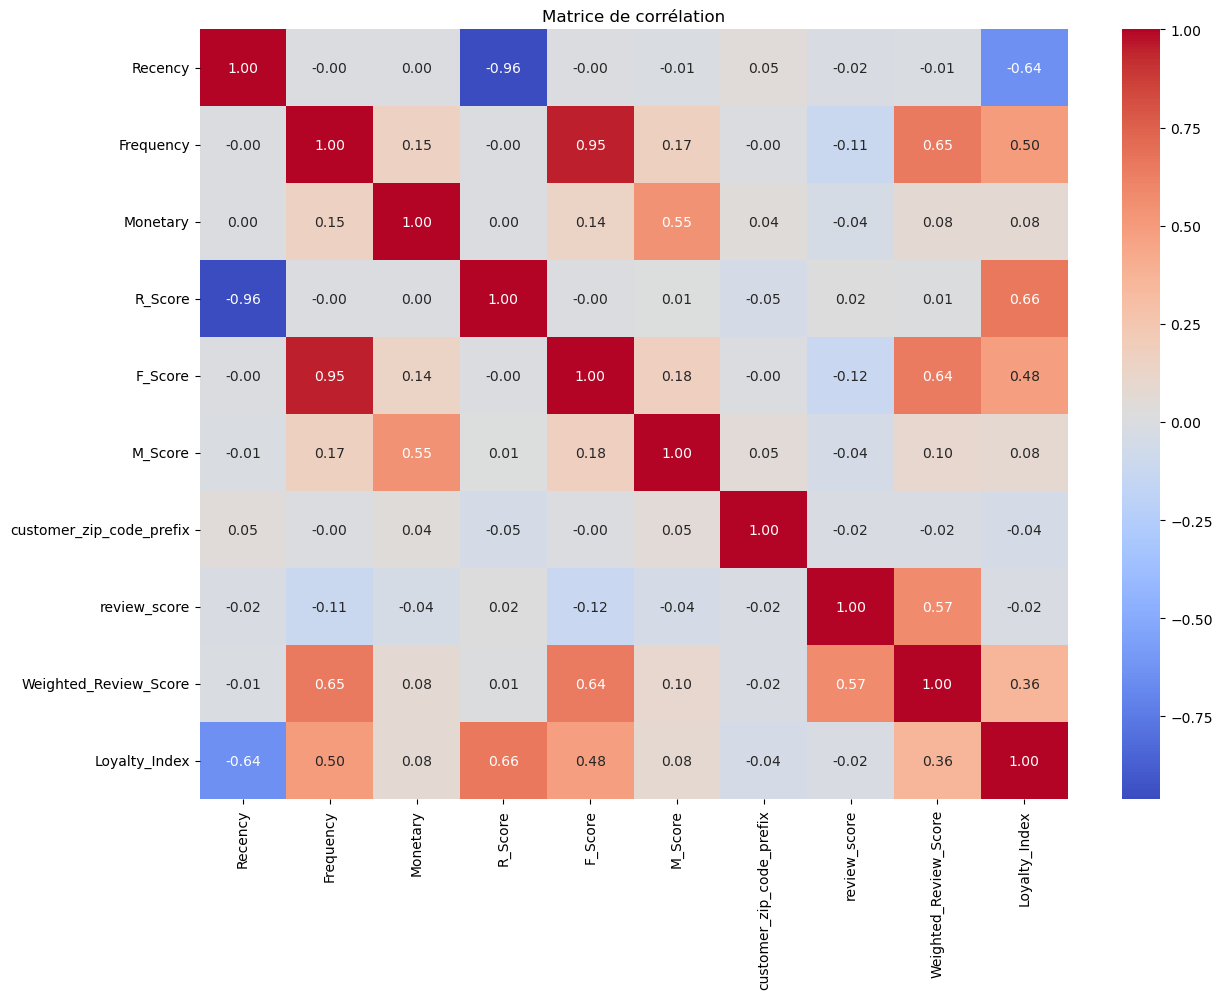

In [206]:
plt.figure(figsize=(14, 10))
rfm_numeric = rfm_df.select_dtypes(include=["number"])
corr_matrix = rfm_numeric.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

Standardisation des données pour le fichier rfm

In [208]:
# Instancier StandardScaler
scaler = StandardScaler()
# Vérifier que toutes les colonnes de 'rfm' sont numériques
numerical_columns_rfm = rfm.select_dtypes(include=['float64', 'int64']).columns
# Appliquer la standardisation uniquement sur les colonnes numériques
rfm[numerical_columns_rfm] = scaler.fit_transform(rfm[numerical_columns_rfm])
# Afficher un aperçu du DataFrame standardisé
print("Standardisation du DataFrame 'rfm' :")
print(rfm.head())

Standardisation du DataFrame 'rfm' :
    Recency  Frequency  Monetary
0  0.714894   -0.26322 -0.374347
1  1.627605   -0.26322  0.484922
2 -0.086988   -0.26322  0.290755
3 -1.429978   -0.26322 -0.592298
4  2.155674   -0.26322  0.295028


In [212]:
rfm_time = rfm_df

In [214]:
# Suppression des colonnes order_purchase_timestamp et customer_id
rfm_df = rfm_df.drop(columns=['order_purchase_timestamp','customer_id'])
rfm_df

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,customer_zip_code_prefix,review_score,Weighted_Review_Score,Loyalty_Index,Payment_credit_card,Payment_debit_card,Payment_voucher,Category_Electronics and Technology,Category_Fashion and Accessories,Category_Food and Beverages,Category_Health and Beauty,Category_Home and Furniture,Category_Industry and Business,Category_Others,Category_Sports and Outdoor,Category_Toys and Entertainment
0,0.714894,-0.26322,-0.374347,2,1,2,-0.239742,0.672171,0.162736,-0.615072,True,False,False,False,False,False,False,False,False,True,False,False
1,1.627605,-0.26322,0.484922,1,1,5,-0.650432,-0.078967,-0.245750,-0.739293,True,False,False,False,False,False,False,False,False,True,False,False
2,-0.086988,-0.26322,0.290755,3,1,5,0.016914,0.672171,0.162736,-0.402313,True,False,False,False,False,False,False,True,False,False,False,False
3,-1.429978,-0.26322,-0.592298,5,1,1,-0.745168,-0.078967,-0.245750,1.605167,True,False,False,False,False,False,True,False,False,False,False,False
4,2.155674,-0.26322,0.295028,1,1,5,-0.735973,0.672171,0.162736,-0.785587,True,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98661,-0.732406,-0.26322,0.770190,4,1,5,1.004075,0.672171,0.162736,-0.017493,False,False,False,False,False,False,False,False,False,True,False,False
98662,-1.266994,-0.26322,1.007605,5,1,5,1.561584,0.672171,0.162736,0.902204,False,False,False,True,False,False,False,False,False,False,False,False
98663,0.454119,-0.26322,-0.179706,2,1,3,-1.044276,0.672171,0.162736,-0.561834,True,False,False,False,False,False,False,False,False,False,True,False
98664,0.903956,-0.26322,-0.388162,2,1,2,-0.733859,0.672171,0.162736,-0.647461,True,False,False,True,False,False,False,False,False,False,False,False


In [359]:
# Exporter les DataFrame en fichier CSV
rfm_df.to_csv('rfm_df_export.csv', index=False)
rfm.to_csv('rfm_export.csv', index=False)
rfm_no_cat.to_csv('rfm_no_cat_export.csv', index=False)
rfm_time.to_csv('rfm-time.csv', index=False)